In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import missingno as msno 
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import missingno as msno 
import missingno as msno
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

In [4]:
def read_data():
    #data = pd.read_csv('../../../../../stefan.nedelkovski/Treatment Episode Data Set: Discharges (TEDS-D)/tedsd_data_2017.csv')
    #data = dataset[dataset['NOPRIOR']==0]
    data = pd.read_csv('TEDS_DATASETS/tedsd_data_2017_edited.csv')
    return data

def filtering_data(dataset):
    dataset = dataset.drop(columns=['MARSTAT', 'DAYWAIT', 'DSMCRIT', 'PRIMINC'])
    dataset = dataset.drop(columns=['CBSA2010','CASEID', 'FREQ_ATND_SELF_HELP', 'PRIMPAY', 'HLTHINS', 'IDU', 'FRSTUSE2', 'FRSTUSE3','ROUTE2', 'ROUTE3', 'SUB2', 'SUB3', 'VET', 'PREG', 'DETNLF', 'FREQ2', 'FREQ3', 'DETCRIM'])
    return dataset

def get_permutation_importance_ready():
    data = read_data()
    data = filtering_data(data)
    data = data.replace({-9:np.nan})
    data = data.dropna()
    msno.matrix(data)
    return data

def permutation_importance():
    data = get_permutation_importance_ready()
    y = data['LIVARAG_D']
    feature_names = [i for i in data.columns]
    X = data[feature_names]
    X = X.drop(columns=['LIVARAG_D', 'REASON'])
    train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
    my_model = RandomForestClassifier(n_estimators=100,
                                  random_state=0).fit(train_X, train_y)
    perm = PermutationImportance(my_model, random_state=1).fit(val_X, val_y)
    eli5.explain_weights(perm, feature_names = val_X.columns.tolist(), top = 54)
    return

def get_classifying_ready():
    data = read_data()
    data = data[['LIVARAG_D','LIVARAG', 'EMPLOY', 'STFIPS', 'AGE', 'DIVISION', 'PSYPROB', 'PSOURCE', 'OPSYNFLG', 'EDUC', 'FREQ1', 'ALCDRUG', 'STIMFLG', 'SERVICES', 'PCPFLG']]
    data = data.replace({-9:np.nan})
    data = data.astype(str)
    data1 = data[['LIVARAG_D', 'LIVARAG', 'EMPLOY', 'STFIPS', 'AGE', 'DIVISION', 'ALCDRUG', 'PSYPROB', 'PSOURCE', 'EDUC', 'FREQ1', 'SERVICES']]
    data2 = data[['PCPFLG', 'OPSYNFLG', 'STIMFLG']]
    data1 = pd.get_dummies(data1)

    print(data1.columns)
    data1 = data1.astype(str)

    dataset = pd.concat([data2, data1], axis=1)
    return dataset

def predict_homelessness():
    dataset = get_classifying_ready()
    y = dataset['LIVARAG_D_1.0']
    feature_names = [i for i in dataset.columns]
    X = dataset[feature_names]
    X = X.drop(columns=['LIVARAG_D_1.0','LIVARAG_D_2.0' ,'LIVARAG_D_3.0', 'LIVARAG_D_nan'])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
    random_forest = RandomForestClassifier(n_estimators=100,
                                  random_state=0).fit(X_train, y_train)
    y_pred = random_forest.predict(X_test)
    print(accuracy_score(y_test, y_pred))

Index(['LIVARAG_D_1.0', 'LIVARAG_D_2.0', 'LIVARAG_D_3.0', 'LIVARAG_D_nan',
       'LIVARAG_1.0', 'LIVARAG_2.0', 'LIVARAG_3.0', 'LIVARAG_nan',
       'EMPLOY_1.0', 'EMPLOY_2.0',
       ...
       'FREQ1_3.0', 'FREQ1_nan', 'SERVICES_1.0', 'SERVICES_2.0',
       'SERVICES_3.0', 'SERVICES_4.0', 'SERVICES_5.0', 'SERVICES_6.0',
       'SERVICES_7.0', 'SERVICES_8.0'],
      dtype='object', length=114)
0.9583757614734623


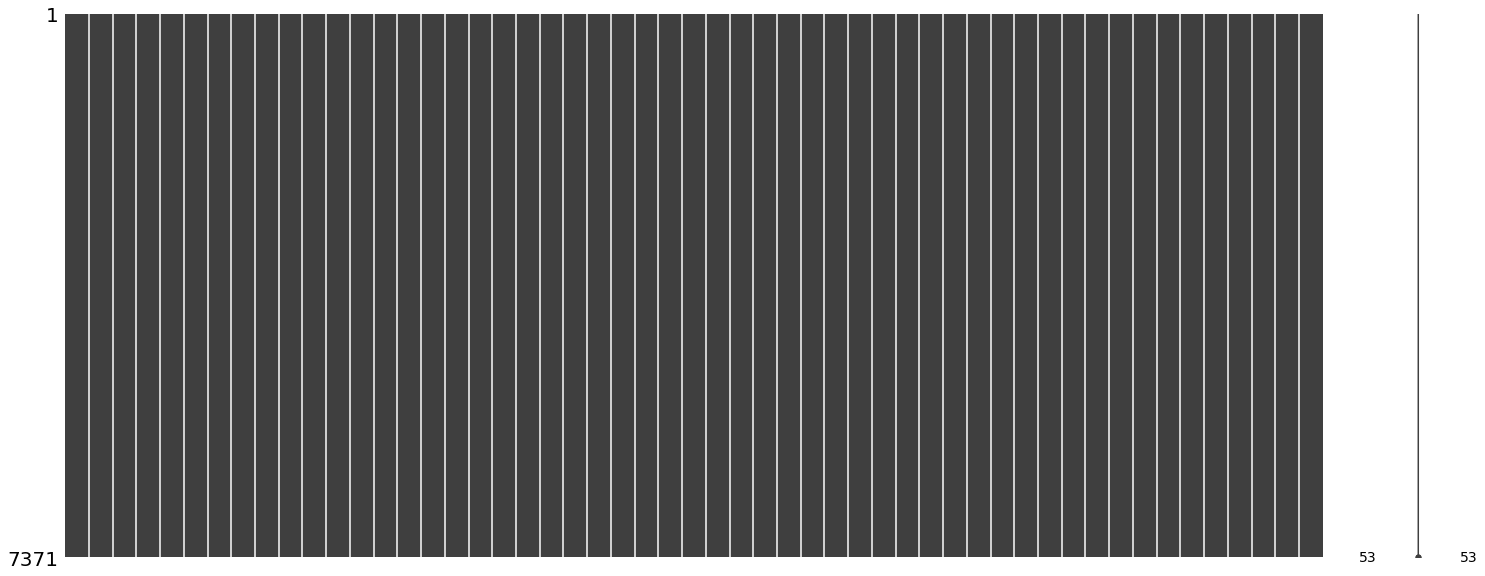

In [5]:
if __name__ == '__main__':
    permutation_importance()
    predict_homelessness()
    